In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn

In [2]:
data = pd.read_excel('hw3-data/trated_mos_data.xlsx')

In [3]:
data.describe()

,Test Hour,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Setup Time (s),MOS
count,45361.000000,45361.000000,45361.000000,45361.000000,45361.000000,45361.000000,45361.000000
mean,12.296135,-71.997707,2.212645,383.261493,74.978603,3.557201,2.510416
std,6.099200,12.545163,3.959077,238.618169,14.996911,1.466274,1.107152
min,0.000000,-113.000000,0.000000,35.090000,47.080000,0.000000,1.000000
25%,8.000000,-81.000000,0.000000,205.560000,60.000000,3.500000,2.100000
50%,13.000000,-73.000000,0.000000,343.140000,60.000000,3.830000,2.700000
75%,17.000000,-63.000000,2.555660,519.470000,90.000000,4.190000,2.700000
max,23.000000,-51.000000,17.000000,1432.960000,90.000000,45.330000,4.400000


In [4]:
# Printing the unique values of the 'MOS' column:
print(np.sort(data.MOS.unique()))
# Total values:
print(f'Total of classes: {data.MOS.nunique()}')

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4]
Total of classes: 35


In [5]:
# Transforming the 'MOS' column values into 5 classes (1-5):
data.loc[(data['MOS']>=1 )&(data['MOS']<2.6),'MOS'] = 1
data.loc[(data['MOS']>=2.6 )&(data['MOS']<3.1),'MOS'] = 2
data.loc[(data['MOS']>=3.1 )&(data['MOS']<3.6),'MOS'] = 3
data.loc[(data['MOS']>=3.6 )&(data['MOS']<4.1),'MOS'] = 4
data.loc[(data['MOS']>=4.1 )&(data['MOS']<5),'MOS'] = 5

In [6]:
# After transformation:
data.MOS.describe(), data.MOS.unique()

(count    45361.000000
 mean         2.142700
 std          1.445477
 min          1.000000
 25%          1.000000
 50%          2.000000
 75%          2.000000
 max          5.000000
 Name: MOS, dtype: float64, array([4., 1., 2., 3., 5.]))

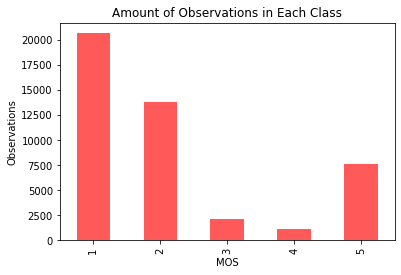

In [7]:
# Bar plot of the amount of samples of each class:
ax = data['MOS'].value_counts().reindex([1,2,3,4,5]).plot.bar(color='red', alpha=0.65)
fig = ax.get_figure()
plt.title('Amount of Observations in Each Class')
plt.ylabel('Observations')
plt.xlabel('MOS')
plt.show()

In [8]:
data2 = data

In [9]:
data.describe()

,Test Hour,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Setup Time (s),MOS
count,45361.000000,45361.000000,45361.000000,45361.000000,45361.000000,45361.000000,45361.000000
mean,12.296135,-71.997707,2.212645,383.261493,74.978603,3.557201,2.142700
std,6.099200,12.545163,3.959077,238.618169,14.996911,1.466274,1.445477
min,0.000000,-113.000000,0.000000,35.090000,47.080000,0.000000,1.000000
25%,8.000000,-81.000000,0.000000,205.560000,60.000000,3.500000,1.000000
50%,13.000000,-73.000000,0.000000,343.140000,60.000000,3.830000,2.000000
75%,17.000000,-63.000000,2.555660,519.470000,90.000000,4.190000,2.000000
max,23.000000,-51.000000,17.000000,1432.960000,90.000000,45.330000,5.000000


In [10]:
data2 = (data2 - data2.mean()) / data2.std()

In [11]:
data2.describe()

,Test Hour,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Setup Time (s),MOS
count,4.536100e+04,4.536100e+04,4.536100e+04,4.536100e+04,4.536100e+04,4.536100e+04,4.536100e+04
mean,3.918379e-14,1.388682e-14,1.529707e-14,-1.246047e-14,-1.730230e-13,1.955927e-14,-2.003546e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.016024e+00,-3.268375e+00,-5.588790e-01,-1.459116e+00,-1.860290e+00,-2.426013e+00,-7.905349e-01
25%,-7.043769e-01,-7.175907e-01,-5.588790e-01,-7.447107e-01,-9.987792e-01,-3.901089e-02,-7.905349e-01
50%,1.154028e-01,-7.989475e-02,-5.588790e-01,-1.681410e-01,-9.987792e-01,1.860493e-01,-9.872154e-02
75%,7.712265e-01,7.172252e-01,8.664009e-02,5.708220e-01,1.001633e+00,4.315695e-01,-9.872154e-02
max,1.754962e+00,1.673769e+00,3.735051e+00,4.399072e+00,1.001633e+00,2.848907e+01,1.976718e+00


In [12]:
data2.MOS = data.MOS

In [14]:
# data.to_excel('hw3-data/cls_trated_mos_data.xlsx')
data2.describe()

NameError: name 'data3' is not defined